# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate

# Configs

In [2]:
# LABELED_PATH = "/Users/maedeh/Desktop/demand_project/demand_project/shoofer-demand-prediction/data/labels_phase2.parquet"
LABELED_PATH = '/Users/maedeh/Desktop/data/labels.parquet'
PREDICTED_XGB_PATH = "/Users/maedeh/Desktop/data/xgb_predictions.parquet"
PREDICTED_CB_PATH = "/Users/maedeh/Desktop/data/cb_predictions.parquet"
# PREDICTED_XGB_ARIMA_PATH = "../data/results/xgb_predictions_tuned.parquet"
# PREDICTED_REGRESSION_PATH = "../data/results/ridge_predictions.parquet"
# PREDICTED_ARIMA_PATH = "../data/results/arima_predict.parquet"
TEST_START_DATE = '2023-04-20'
LAST_WEEK_TEST_START_DATE = '2023-04-13'
HIGH_DEMAND_NUMS = 50
MID_DEMAND_NUMS = 100
SAVE_PLOT_PATH = '../data/pngs/'
warnings.filterwarnings('ignore')

In [3]:
report_dict = {
    'high_demand_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        }
        
    },
    'mid_demand_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        }
        
    },    
    'low_demand_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        }
        
    },
    'all_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        }
    },
    
    
}

In [4]:
predictions_dict = {
    'baseline_last_day':None,
    'baseline_last_week':None,
    'model_regression':None,
    'model_xgboost':None,
    'model_catboost':None
}

In [5]:
sorted_locations_dict={
    'baseline_last_week':None,
    'model_regression':None,
    'model_xgboost':None,
    'model_catboost':None
}

In [6]:
predictions_mean_error_dict={
    
    'baseline_last_week':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_regression':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_xgboost':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_catboost':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
}

# Load Data

## Load labeled data

In [7]:
labeled_df = pd.read_parquet(LABELED_PATH)
print(labeled_df.shape)
labeled_df[:45]
print(len(labeled_df['Date'].unique())*len(labeled_df['Location'].unique()))
labeled_df[labeled_df['Location']==56]

(31440, 3)
31440


,Location,Date,Demand
6600,56,2023-01-01,10.0
6601,56,2023-01-02,10.0
6602,56,2023-01-03,5.0
6603,56,2023-01-04,13.0
6604,56,2023-01-05,14.0
...,...,...,...
6715,56,2023-04-26,7.0
6716,56,2023-04-27,7.0
6717,56,2023-04-28,9.0
6718,56,2023-04-29,1.0


In [8]:
test_df = labeled_df.loc[labeled_df['Date']>=TEST_START_DATE]
test_df = test_df.reset_index(drop = True)
print(test_df.shape)
print(len(test_df['Date'].unique())*len(labeled_df['Location'].unique()))
test_df.tail()


(2882, 3)
2882


,Location,Date,Demand
2877,265,2023-04-26,78.0
2878,265,2023-04-27,44.0
2879,265,2023-04-28,55.0
2880,265,2023-04-29,45.0
2881,265,2023-04-30,69.0


In [9]:
predictions_dict['model_xgboost'] = pd.read_parquet(PREDICTED_XGB_PATH)
predictions_dict['model_xgboost']

,Location,Date,Predicted_demand
0,1,2023-04-01,16.912674
1,1,2023-04-02,18.158730
2,1,2023-04-03,11.263210
3,1,2023-04-04,11.029713
4,1,2023-04-05,11.032634
...,...,...,...
7855,265,2023-04-26,53.763832
7856,265,2023-04-27,77.131378
7857,265,2023-04-28,62.146381
7858,265,2023-04-29,66.217072


## Load Predicted Data

In [10]:
predictions_dict['model_xgboost'] = pd.read_parquet(PREDICTED_XGB_PATH)
print(predictions_dict['model_xgboost'].shape)
print(len(predictions_dict['model_xgboost']['Date'].unique())*len(predictions_dict['model_xgboost']['Location'].unique()))
predictions_dict['model_xgboost'].head()

(7860, 3)
7860


,Location,Date,Predicted_demand
0,1,2023-04-01,16.912674
1,1,2023-04-02,18.158730
2,1,2023-04-03,11.263210
3,1,2023-04-04,11.029713
4,1,2023-04-05,11.032634


In [11]:
# predictions_dict['model_catboost'] = pd.read_parquet(PREDICTED_CB_PATH)
# print(predictions_dict['model_catboost'].shape)
# predictions_dict['model_catboost'].head()

In [12]:
# predictions_dict['model_regression'] = pd.read_parquet(PREDICTED_REGRESSION_PATH)
# print(predictions_dict['model_regression'].shape)
# predictions_dict['model_regression'].head()

### BaseLine Models

In [13]:
def baseline_predict(dataset, shift_val):
    predicted_demand = dataset.groupby(['Location'])['Demand'].shift(shift_val)
    predicted_data = pd.DataFrame(dataset[['Location', 'Date']])
    predicted_data['Predicted_demand'] = predicted_demand
    return predicted_data

In [14]:
baseline_test_df = labeled_df.loc[labeled_df['Date']>=LAST_WEEK_TEST_START_DATE]
baseline_test_df = baseline_test_df.reset_index(drop = True)
print(baseline_test_df.shape)
print(len(baseline_test_df['Location'].unique()))
baseline_test_df.head()


(4716, 3)
262


,Location,Date,Demand
0,1,2023-04-13,18.0
1,1,2023-04-14,12.0
2,1,2023-04-15,15.0
3,1,2023-04-16,24.0
4,1,2023-04-17,16.0


In [15]:
predictions_dict['baseline_last_week'] = baseline_predict(baseline_test_df, 7)
predictions_dict['baseline_last_week'] = predictions_dict['baseline_last_week'].dropna()
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()

(2882, 3)


,Location,Date,Predicted_demand
7,1,2023-04-20,18.0
8,1,2023-04-21,12.0
9,1,2023-04-22,15.0
10,1,2023-04-23,24.0
11,1,2023-04-24,16.0


### Join Predictions and Actual

In [16]:
def join_actual_predict(actual_df, predicted_df):
    actual_predicted_df = actual_df.merge(predicted_df, how='left', on=['Location', 'Date'])
    actual_predicted_df['day_of_week'] = actual_predicted_df['Date'].dt.dayofweek
    return actual_predicted_df

In [17]:
predictions_dict['baseline_last_week'] = join_actual_predict(test_df,predictions_dict['baseline_last_week'])
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()


(2882, 5)


,Location,Date,Demand,Predicted_demand,day_of_week
0,1,2023-04-20,15.0,18.0,3
1,1,2023-04-21,15.0,12.0,4
2,1,2023-04-22,16.0,15.0,5
3,1,2023-04-23,24.0,24.0,6
4,1,2023-04-24,10.0,16.0,0


In [18]:

len(predictions_dict['baseline_last_week'][predictions_dict['baseline_last_week']['Location']==56])

11

In [19]:
predictions_dict['model_xgboost'][predictions_dict['model_xgboost']['Location']==56]

,Location,Date,Predicted_demand
1650,56,2023-04-01,6.196421
1651,56,2023-04-02,6.616126
1652,56,2023-04-03,8.970122
1653,56,2023-04-04,9.631005
1654,56,2023-04-05,8.238615
1655,56,2023-04-06,9.689074
1656,56,2023-04-07,7.007893
1657,56,2023-04-08,8.419130
1658,56,2023-04-09,4.878112
1659,56,2023-04-10,8.616264


In [20]:
for i in range(265):
    print(i,len(predictions_dict['model_xgboost'][predictions_dict['model_xgboost']['Location']==i+1]))

0 30
1 30
2 30
3 30
4 30
5 30
6 30
7 30
8 30
9 30
10 30
11 30
12 30
13 30
14 30
15 30
16 30
17 30
18 30
19 30
20 30
21 30
22 30
23 30
24 30
25 30
26 30
27 30
28 30
29 30
30 30
31 30
32 30
33 30
34 30
35 30
36 30
37 30
38 30
39 30
40 30
41 30
42 30
43 30
44 30
45 30
46 30
47 30
48 30
49 30
50 30
51 30
52 30
53 30
54 30
55 30
56 30
57 30
58 30
59 30
60 30
61 30
62 30
63 30
64 30
65 30
66 30
67 30
68 30
69 30
70 30
71 30
72 30
73 30
74 30
75 30
76 30
77 30
78 30
79 30
80 30
81 30
82 30
83 30
84 30
85 30
86 30
87 30
88 30
89 30
90 30
91 30
92 30
93 30
94 30
95 30
96 30
97 30
98 30
99 30
100 30
101 30
102 0
103 0
104 30
105 30
106 30
107 30
108 30
109 0
110 30
111 30
112 30
113 30
114 30
115 30
116 30
117 30
118 30
119 30
120 30
121 30
122 30
123 30
124 30
125 30
126 30
127 30
128 30
129 30
130 30
131 30
132 30
133 30
134 30
135 30
136 30
137 30
138 30
139 30
140 30
141 30
142 30
143 30
144 30
145 30
146 30
147 30
148 30
149 30
150 30
151 30
152 30
153 30
154 30
155 30
156 30
157 30
158 30


In [22]:
# predictions_dict['model_catboost'].shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [23]:
test_df.shape

(2882, 3)

In [ ]:
# predictions_dict['model_catboost'] = join_actual_predict(test_df,predictions_dict['model_catboost'])
# print(predictions_dict['model_catboost'].shape)
# predictions_dict['model_catboost'].head()

In [24]:
predictions_dict['model_xgboost'] = join_actual_predict(test_df,predictions_dict['model_xgboost'])
print(predictions_dict['model_xgboost'].shape)
predictions_dict['model_xgboost'].head()

(2882, 5)


,Location,Date,Demand,Predicted_demand,day_of_week
0,1,2023-04-20,15.0,14.208098,3
1,1,2023-04-21,15.0,12.245880,4
2,1,2023-04-22,16.0,14.398076,5
3,1,2023-04-23,24.0,18.469688,6
4,1,2023-04-24,10.0,18.581171,0


In [ ]:
# predictions_dict['model_regression'] = join_actual_predict(test_df,predictions_dict['model_regression'])
# print(predictions_dict['model_regression'].shape)
# predictions_dict['model_regression'].head()

In [25]:
sorted_index=predictions_dict['model_xgboost'].groupby('Location')['Demand'].aggregate(['sum']).sort_values('sum', ascending=False).reset_index()
sorted_index


,Location,sum
0,132,65459.0
1,237,59637.0
2,161,54985.0
3,236,53572.0
4,142,43950.0
...,...,...
257,204,0.0
258,199,0.0
259,172,0.0
260,176,0.0


### Sort Locations by Demand

In [26]:
def sort_locations_on_demand(predictions_dict,sorted_locations_dict):
    for label,predictions_df in predictions_dict.items():
        if (predictions_df is not None):
            print(label)
            sorted_index = predictions_df.groupby('Location')['Demand'].aggregate(['sum']).sort_values('sum', ascending=False)
            sorted_index = sorted_index.reset_index()
            sorted_locations_dict[label] = sorted_index
            

In [27]:
sort_locations_on_demand(predictions_dict, sorted_locations_dict)
print(sorted_locations_dict['model_xgboost'].shape)
sorted_locations_dict['model_xgboost'].head()

baseline_last_week
model_xgboost
(262, 2)


,Location,sum
0,132,65459.0
1,237,59637.0
2,161,54985.0
3,236,53572.0
4,142,43950.0


In [ ]:
print(sorted_locations_dict['model_catboost'].shape)
predictions_dict['model_catboost'].head()

In [28]:
sort_locations_on_demand(predictions_dict, sorted_locations_dict)
print(sorted_locations_dict['baseline_last_week'].shape)
sorted_locations_dict['baseline_last_week'].head()

baseline_last_week
model_xgboost
(262, 2)


,Location,sum
0,132,65459.0
1,237,59637.0
2,161,54985.0
3,236,53572.0
4,142,43950.0


# Mean error Calculation

### Error Columns

In [29]:
def calculate_error(actual_predicted_dict: dict):
    for label,actual_predicted_df in actual_predicted_dict.items():
        if (actual_predicted_df is not None):
            actual_predicted_df['error'] = np.abs(
                actual_predicted_df['Demand']-actual_predicted_df['Predicted_demand']
                )
            actual_predicted_df['squared_error'] = np.square(
                actual_predicted_df['Demand']-actual_predicted_df['Predicted_demand']
                )
            actual_Demand_df = np.where(actual_predicted_df['Demand']==0, 1, actual_predicted_df['Demand'])
            actual_predicted_df['percentage_error'] = (
                actual_predicted_df['error']/actual_Demand_df
                )*100
            

In [30]:
calculate_error(predictions_dict)


In [31]:
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()


(2882, 8)


,Location,Date,Demand,Predicted_demand,day_of_week,error,squared_error,percentage_error
0,1,2023-04-20,15.0,18.0,3,3.0,9.0,20.00
1,1,2023-04-21,15.0,12.0,4,3.0,9.0,20.00
2,1,2023-04-22,16.0,15.0,5,1.0,1.0,6.25
3,1,2023-04-23,24.0,24.0,6,0.0,0.0,0.00
4,1,2023-04-24,10.0,16.0,0,6.0,36.0,60.00


In [32]:
predictions_dict['baseline_last_week'].tail()

,Location,Date,Demand,Predicted_demand,day_of_week,error,squared_error,percentage_error
2877,265,2023-04-26,78.0,42.0,2,36.0,1296.0,46.153846
2878,265,2023-04-27,44.0,63.0,3,19.0,361.0,43.181818
2879,265,2023-04-28,55.0,53.0,4,2.0,4.0,3.636364
2880,265,2023-04-29,45.0,46.0,5,1.0,1.0,2.222222
2881,265,2023-04-30,69.0,77.0,6,8.0,64.0,11.594203


In [33]:
print(predictions_dict['model_catboost'].shape)
predictions_dict['model_catboost'].head()

AttributeError: 'NoneType' object has no attribute 'shape'

### Aggregate Error Columns

In [34]:
high_demand_actual_predicted_df = predictions_dict['model_xgboost'].loc[predictions_dict['model_xgboost']['Location']\
.isin(sorted_locations_dict['model_xgboost']['Location'][:HIGH_DEMAND_NUMS])]

high_demand_actual_predicted_df
# sorted_locations_dict['model_xgboost']['Location']
# sorted_index[:HIGH_DEMAND_NUMS]
high_demand_error_df=high_demand_actual_predicted_df[['Location','Demand','error','squared_error', 'percentage_error']] 
high_demand_error_df

,Location,Demand,error,squared_error,percentage_error
132,13,813.0,12.321289,151.814164,1.515534
133,13,625.0,63.002991,3969.376840,10.080479
134,13,528.0,44.403442,1971.665695,8.409743
135,13,378.0,9.851013,97.042461,2.606088
136,13,611.0,119.906281,14377.516108,19.624596
...,...,...,...,...,...
2866,264,1110.0,64.094238,4108.071381,5.774256
2867,264,1230.0,18.164917,329.964209,1.476823
2868,264,1310.0,86.313965,7450.100527,6.588852
2869,264,1367.0,24.258301,588.465157,1.774565


In [35]:
mape=('percentage_error','mean')
mape
agg(mape)

NameError: name 'agg' is not defined

In [36]:
high_demand_error_df.groupby('Location').agg(mape,mae,mse,demand_mean)

NameError: name 'mae' is not defined

In [37]:
def calculate_mean_error(actual_predicted_dict: dict, predictions_mean_dict: dict):
    per_columns=['Location', 'Date', 'day_of_week']
    for model,actual_predicted_df in actual_predicted_dict.items():
        if (actual_predicted_df is not None):
            sorted_index = sorted_locations_dict[model]['Location']
            high_demand_actual_predicted_df = actual_predicted_df.loc[actual_predicted_df['Location'].isin(sorted_index[:HIGH_DEMAND_NUMS])]
            mid_demand_actual_predicted_df = actual_predicted_df.loc[actual_predicted_df['Location'].isin(sorted_index[HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS])]
            low_demand_actual_predicted_df = actual_predicted_df.loc[actual_predicted_df['Location'].isin(sorted_index[HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:])]
            for per in per_columns:
                high_demand_error_df = high_demand_actual_predicted_df[[per,'Demand','error','squared_error', 'percentage_error']] 
                mid_demand_error_df = mid_demand_actual_predicted_df[[per,'Demand','error','squared_error','percentage_error']] 
                low_demand_error_df = low_demand_actual_predicted_df[[per,'Demand','error','squared_error','percentage_error']] 
                all_error_df = actual_predicted_df[[per,'Demand','error','squared_error','percentage_error']]
                
                high_demand_mean_df = (
                    high_demand_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                            mae=('error','mean'),
                                                            mse=('squared_error','mean'),
                                                            demand_mean=('Demand','mean'))) 
                mid_demand_mean_df = (
                    mid_demand_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                            mae=('error','mean'),
                                                            mse=('squared_error','mean'),
                                                            demand_mean=('Demand','mean')))
                low_demand_mean_df = (
                    low_demand_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                            mae=('error','mean'),
                                                            mse=('squared_error','mean'),
                                                            demand_mean=('Demand','mean')))
                all_mean_df = (
                    all_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                    mae=('error','mean'),
                                                    mse=('squared_error','mean'),
                                                    demand_mean=('Demand','mean'))) 
                
                high_demand_mean_df['mape'] = np.where(high_demand_mean_df['mape']>100, 100, high_demand_mean_df['mape'])
                mid_demand_mean_df['mape'] = np.where(mid_demand_mean_df['mape']>100, 100, mid_demand_mean_df['mape'])
                low_demand_mean_df['mape'] = np.where(low_demand_mean_df['mape']>100, 100, low_demand_mean_df['mape'])
                all_mean_df['mape'] = np.where(all_mean_df['mape']>100, 100, all_mean_df['mape'])
                if per == 'Location':
                    high_demand_mean_df = high_demand_mean_df.reindex(sorted_index[:HIGH_DEMAND_NUMS])
                    mid_demand_mean_df = mid_demand_mean_df.reindex(sorted_index[HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS])
                    low_demand_mean_df = low_demand_mean_df.reindex(sorted_index[HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:])
                    all_mean_df = all_mean_df.reindex(sorted_index)
                
                predictions_mean_dict[model][per]['high_demand_loc'] = high_demand_mean_df.reset_index()
                predictions_mean_dict[model][per]['mid_demand_loc'] = mid_demand_mean_df.reset_index()
                predictions_mean_dict[model][per]['low_demand_loc'] = low_demand_mean_df.reset_index()
                predictions_mean_dict[model][per]['all_loc'] = all_mean_df.reset_index()
                
    

In [38]:
calculate_mean_error(predictions_dict, predictions_mean_error_dict)

In [39]:
print(predictions_mean_error_dict['baseline_last_week']['Date']['mid_demand_loc'].shape)
predictions_mean_error_dict['baseline_last_week']['Date']['mid_demand_loc'].head()

(11, 5)


,Date,mape,mae,mse,demand_mean
0,2023-04-20,40.233754,7.92,190.42,38.56
1,2023-04-21,50.377954,8.31,314.73,39.70
2,2023-04-22,48.936846,10.12,341.68,44.99
3,2023-04-23,56.344385,7.12,129.76,36.75
4,2023-04-24,48.691613,6.15,112.19,29.52


In [40]:
print(predictions_mean_error_dict['model_xgboost']['Location']['mid_demand_loc'].shape)
predictions_mean_error_dict['model_xgboost']['Location']['mid_demand_loc'].tail()

(100, 5)


,Location,mape,mae,mse,demand_mean
95,242,83.834342,2.285796,6.197764,5.090909
96,55,87.068887,1.942762,5.873587,5.000000
97,131,57.217200,1.897483,6.834563,5.000000
98,117,85.728953,2.241817,6.766954,5.000000
99,235,82.017658,2.677078,11.272647,5.000000


In [41]:
print(predictions_mean_error_dict['model_catboost']['Location']['mid_demand_loc'].shape)
predictions_mean_error_dict['model_catboost']['Location']['mid_demand_loc'].tail()

AttributeError: 'NoneType' object has no attribute 'shape'

### Plot Mape for Models Predicted Demands

In [42]:
def plot_mape(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,25))
    
    for model,mean_df in predictions_mean_dict.items():
        high_demand_df = mean_df[per]['high_demand_loc']
        mid_demand_df = mean_df[per]['mid_demand_loc']
        low_demand_df = mean_df[per]['low_demand_loc']
        all_df = mean_df[per]['all_loc']
        
        if ((low_demand_df is not None) and 
            (mid_demand_df is not None)and 
            (high_demand_df is not None)and 
            (all_df is not None)):
            
            high_demand_df[per] = high_demand_df[per].astype(str)
            mid_demand_df[per] = mid_demand_df[per].astype(str)
            low_demand_df[per] = low_demand_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            high_demand_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[0],label=model)            
            mid_demand_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[1],label=model)
            low_demand_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[2],label=model)
            all_df.plot(x=per,y='mape',kind='line',ax = axes[3],label=model)

    axes[0].set_title('Models MAPE for '+str(HIGH_DEMAND_NUMS)+' high demand locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models MAPE for '+str(MID_DEMAND_NUMS)+' lower demand locations', bbox=dict( alpha=0.5)) 
    axes[2].set_title('Models MAPE for other low demand locations', bbox=dict( alpha=0.5)) 
    axes[-1].set_title('Models MAPE for all locations', bbox=dict(alpha=0.5))

    plot_name = SAVE_PLOT_PATH + 'MAPE_plot per '+per+'.svg'
    plt.savefig(plot_name, format='svg', dpi=1200)  


FileNotFoundError: [Errno 2] No such file or directory: '../data/pngs/MAPE_plot per Location.svg'

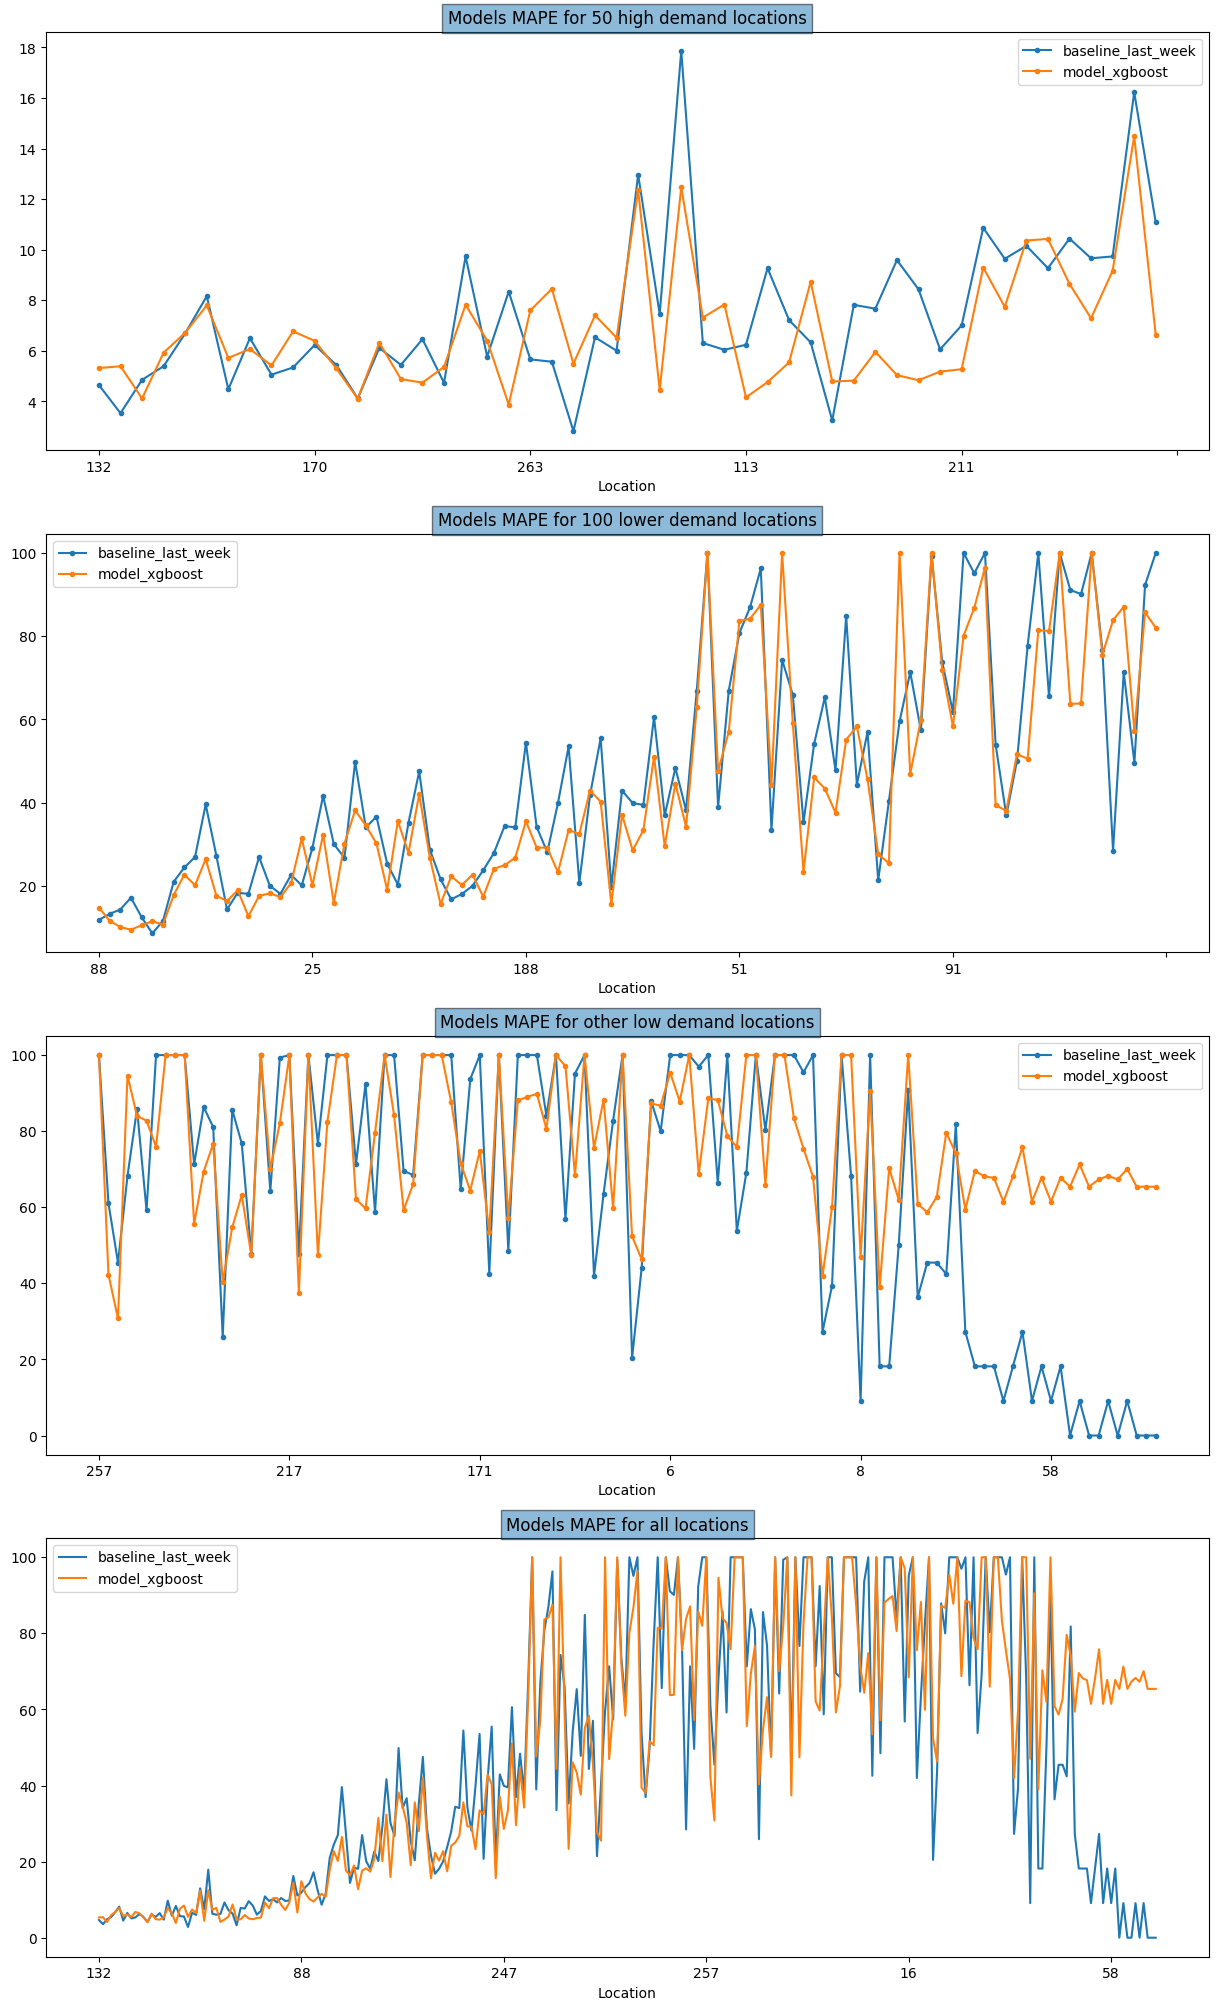

In [43]:
plot_mape(predictions_mean_error_dict, 'Location')

FileNotFoundError: [Errno 2] No such file or directory: '../data/pngs/MAPE_plot per Date.svg'

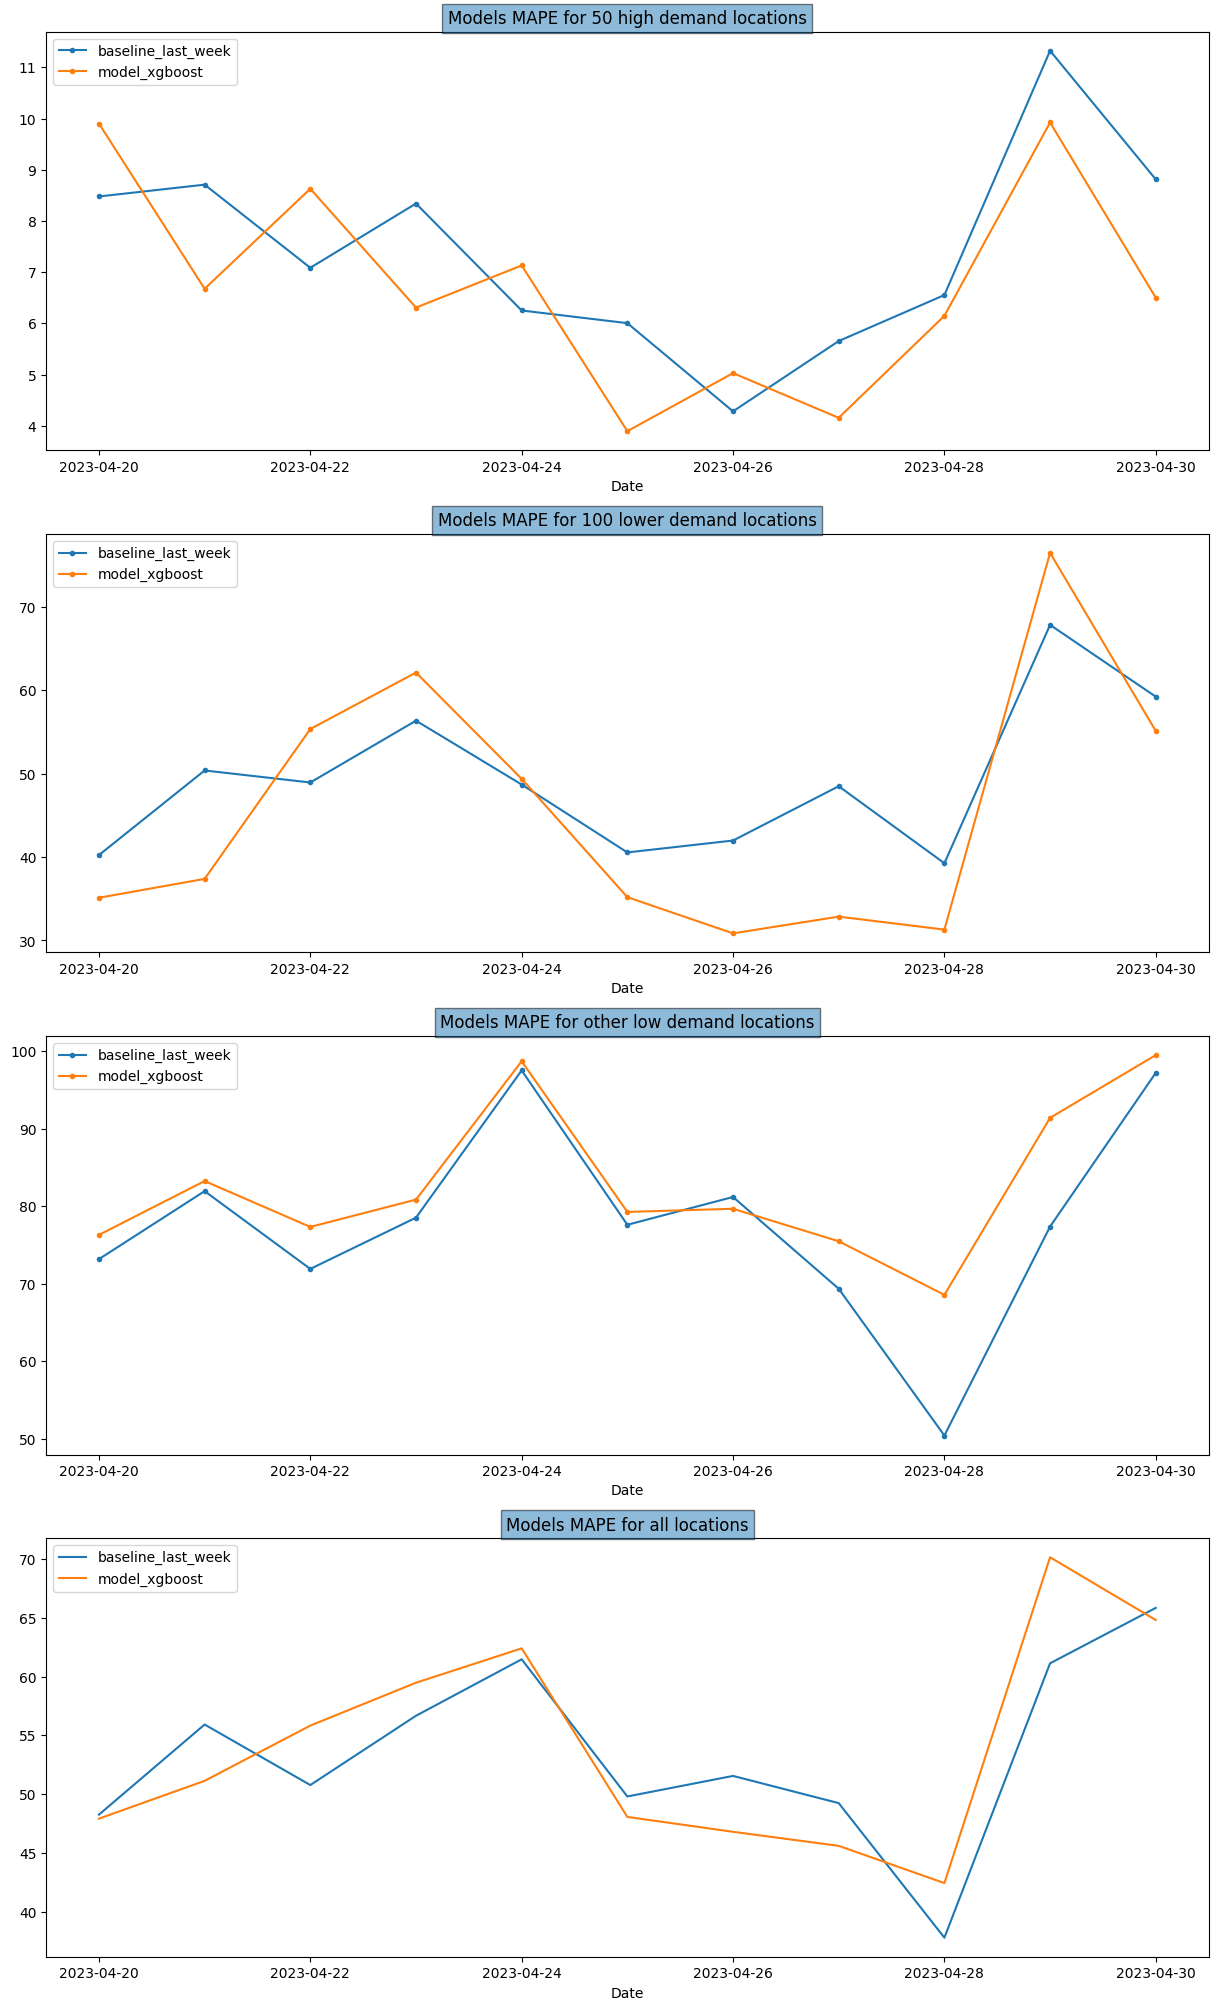

In [45]:
plot_mape(predictions_mean_error_dict, 'Date')

FileNotFoundError: [Errno 2] No such file or directory: '../data/pngs/MAPE_plot per day_of_week.svg'

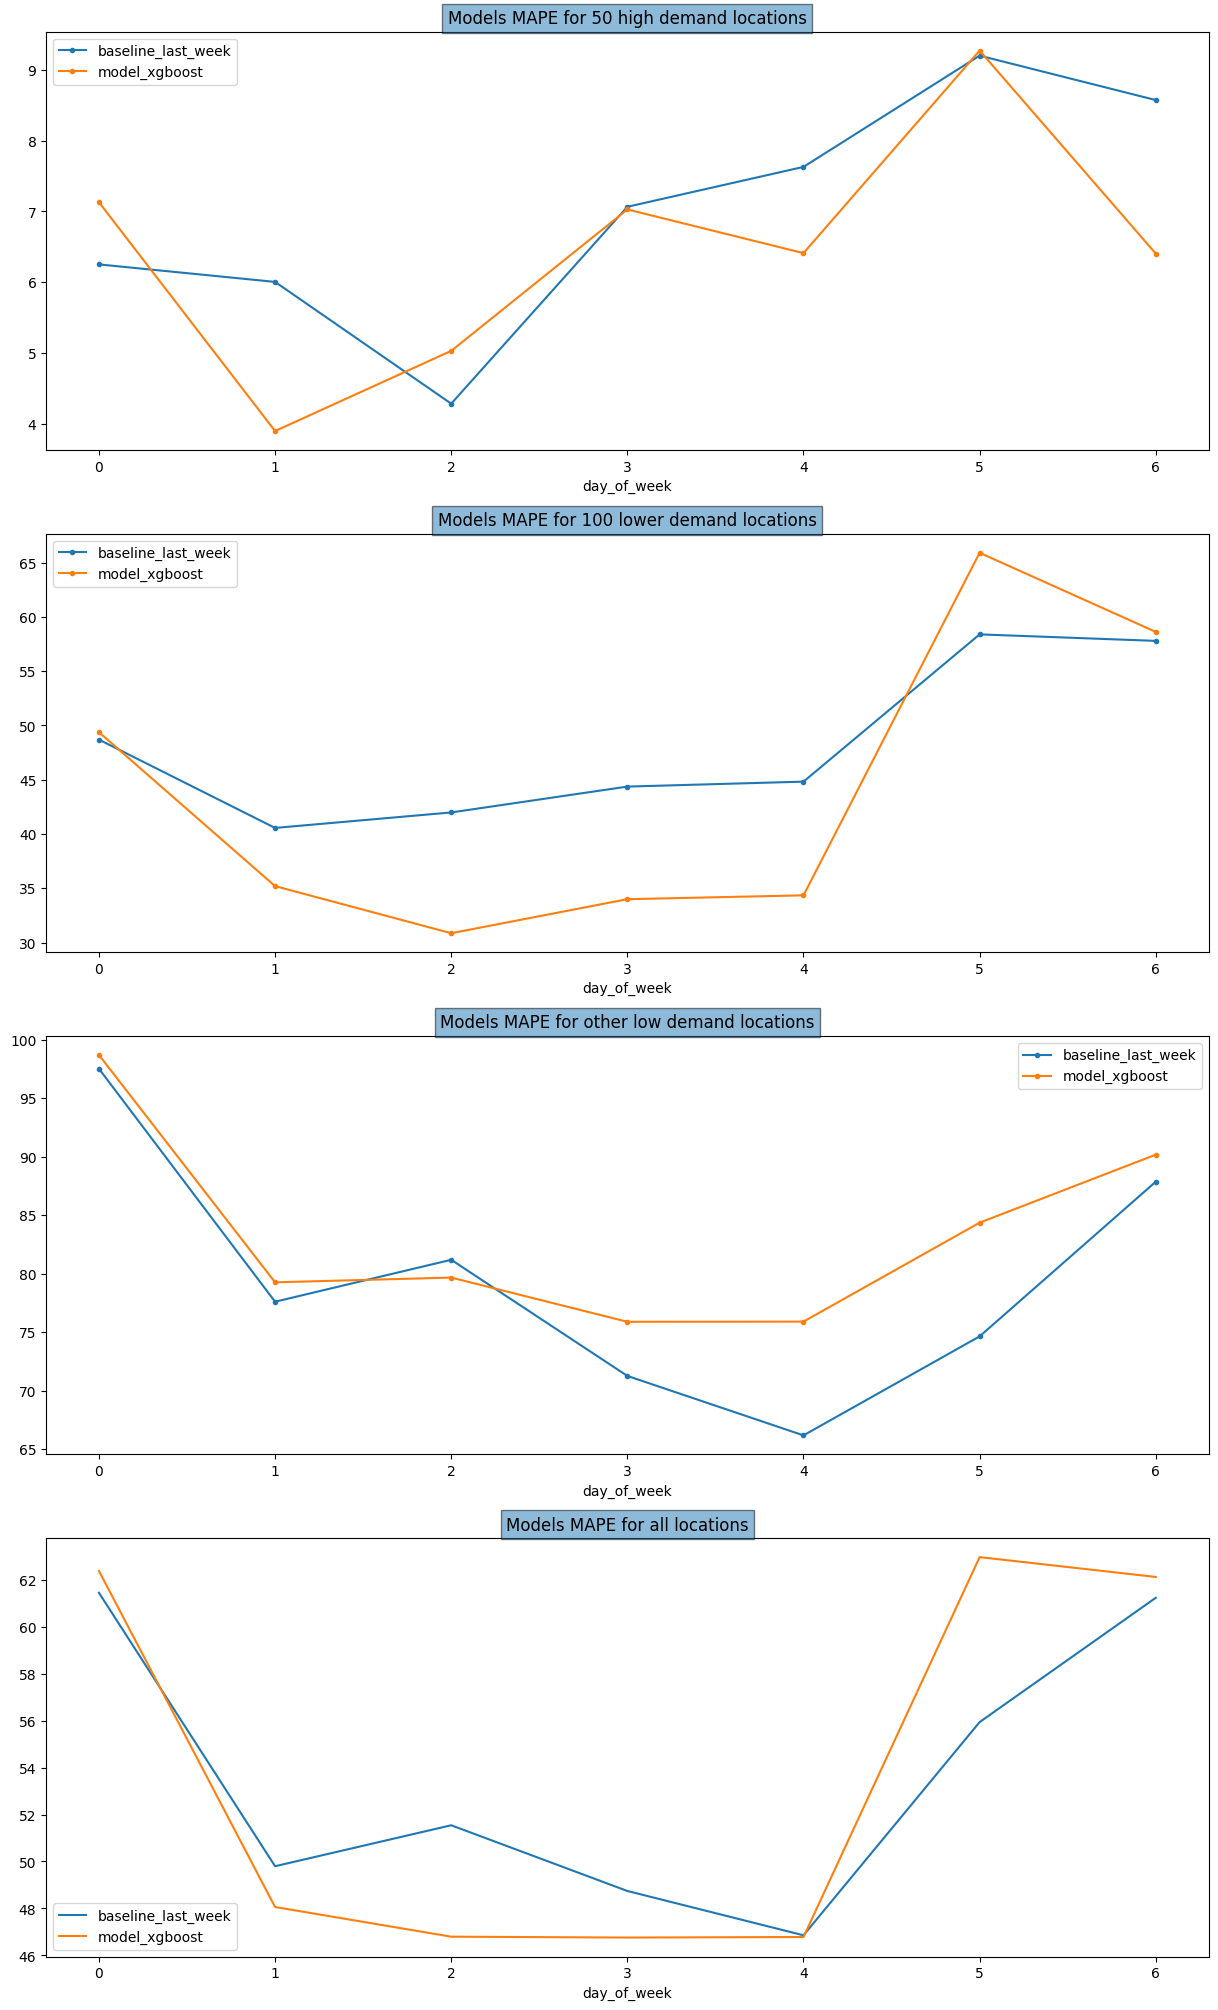

In [46]:
plot_mape(predictions_mean_error_dict, 'day_of_week')

### Plot MAE

In [ ]:
def plot_mae(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,25))
    
    for model,mean_df in predictions_mean_dict.items():
        high_demand_df = mean_df[per]['high_demand_loc']
        mid_demand_df = mean_df[per]['mid_demand_loc']
        low_demand_df = mean_df[per]['low_demand_loc']
        all_df = mean_df[per]['all_loc']
        
        if ((low_demand_df is not None) and 
            (mid_demand_df is not None)and 
            (high_demand_df is not None)and 
            (all_df is not None)):

            high_demand_df[per] = high_demand_df[per].astype(str)
            mid_demand_df[per] = mid_demand_df[per].astype(str)
            low_demand_df[per] = low_demand_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            high_demand_df.plot(x=per,y='mae',kind='line',marker='.',ax = axes[0], label=model)            
            mid_demand_df.plot(x=per,y='mae',kind='line',marker='.',ax = axes[1],label=model)
            low_demand_df.plot(x=per,y='mae',kind='line',marker='.',ax = axes[2],label=model)
            all_df.plot(x=per,y='mae',kind='line',ax = axes[3],label=model)

    axes[0].set_title('Models MAE for '+str(HIGH_DEMAND_NUMS)+' high demand locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models MAE for '+str(MID_DEMAND_NUMS)+' lower demand locations', bbox=dict( alpha=0.5)) 
    axes[2].set_title('Models MAE for other low demand locations', bbox=dict( alpha=0.5)) 
    axes[-1].set_title('Models MAE for all locations', bbox=dict(alpha=0.5))

    plot_name = SAVE_PLOT_PATH + 'ME_plot per '+per+'.svg'
    plt.savefig(plot_name, format='svg', dpi=1200)  


In [ ]:
plot_mae(predictions_mean_error_dict, 'Location')

In [ ]:
plot_mae(predictions_mean_error_dict, 'Date')

In [ ]:
plot_mae(predictions_mean_error_dict, 'day_of_week')

### plot RMSE

In [ ]:
def plot_rmse(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,25))
    
    for model,mean_df in predictions_mean_dict.items():
        high_demand_df = mean_df[per]['high_demand_loc']
        mid_demand_df = mean_df[per]['mid_demand_loc']
        low_demand_df = mean_df[per]['low_demand_loc']
        all_df = mean_df[per]['all_loc']
        if ((low_demand_df is not None) and 
            (mid_demand_df is not None)and 
            (high_demand_df is not None)and 
            (all_df is not None)):
            
            high_demand_df[per] = high_demand_df[per].astype(str)
            mid_demand_df[per] = mid_demand_df[per].astype(str)
            low_demand_df[per] = low_demand_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            high_demand_df['rmse'] = np.sqrt(high_demand_df['mse'])
            mid_demand_df['rmse'] = np.sqrt(mid_demand_df['mse'])
            low_demand_df['rmse'] = np.sqrt(low_demand_df['mse'])
            all_df['rmse'] = np.sqrt(all_df['mse'])

            high_demand_df.plot(x=per,y='rmse',kind='line',marker='.',ax = axes[0], label=model)            
            mid_demand_df.plot(x=per,y='rmse',kind='line',marker='.',ax = axes[1],label=model)
            low_demand_df.plot(x=per,y='rmse',kind='line',marker='.',ax = axes[2],label=model)
            all_df.plot(x=per,y='rmse',kind='line',ax = axes[3],label=model)

    axes[0].set_title('Models RMSE for '+str(HIGH_DEMAND_NUMS)+' high demand locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models RMSE for '+str(MID_DEMAND_NUMS)+' lower demand locations', bbox=dict( alpha=0.5)) 
    axes[2].set_title('Models RMSE for other low demand locations', bbox=dict( alpha=0.5)) 
    axes[-1].set_title('Models RMSE for all locations', bbox=dict(alpha=0.5))

    plot_name = SAVE_PLOT_PATH + 'ME_plot per '+per+'.svg'
    plt.savefig(plot_name, format='svg', dpi=1200)  


In [ ]:
plot_rmse(predictions_mean_error_dict, 'Location')

In [ ]:
plot_rmse(predictions_mean_error_dict, 'Date')

In [ ]:
plot_rmse(predictions_mean_error_dict, 'day_of_week')

# Table of Results

In [ ]:
def create_table_errors(predictions_dict, report_dict):
    for model, error_df in predictions_dict.items():
        if error_df is not None:
            report_dict['all_locations']['MAE'][model] = error_df['error'].mean()            
            report_dict['all_locations']['RMSE'][model] = np.sqrt(error_df['squared_error'].mean())
            report_dict['all_locations']['MAPE'][model] = error_df['percentage_error'].mean()

            error_high_demand_df = error_df.loc[error_df['Location'].isin(sorted_locations_dict[model][:HIGH_DEMAND_NUMS]['Location'])]
            error_mid_demand_df = error_df.loc[error_df['Location'].isin(sorted_locations_dict[model][HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS]['Location'])]
            error_low_demand_df = error_df.loc[error_df['Location'].isin(sorted_locations_dict[model][HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:]['Location'])]

            report_dict['high_demand_locations']['MAE'][model] = error_high_demand_df['error'].mean()            
            report_dict['high_demand_locations']['RMSE'][model] = np.sqrt(error_high_demand_df['squared_error'].mean())
            report_dict['high_demand_locations']['MAPE'][model] = error_high_demand_df['percentage_error'].mean()
            
            report_dict['mid_demand_locations']['MAE'][model] = error_mid_demand_df['error'].mean()            
            report_dict['mid_demand_locations']['RMSE'][model] = np.sqrt(error_mid_demand_df['squared_error'].mean())
            report_dict['mid_demand_locations']['MAPE'][model] = error_mid_demand_df['percentage_error'].mean()
            
            report_dict['low_demand_locations']['MAE'][model] = error_low_demand_df['error'].mean()            
            report_dict['low_demand_locations']['RMSE'][model] = np.sqrt(error_low_demand_df['squared_error'].mean())
            report_dict['low_demand_locations']['MAPE'][model] = error_low_demand_df['percentage_error'].mean()
    return report_dict

In [ ]:
report_dict = create_table_errors(predictions_dict, report_dict)
report_df = pd.DataFrame.from_dict({(i,j): report_dict[i][j] 
                            for i in report_dict.keys() 
                            for j in report_dict[i].keys()},
                            orient='index')

report_df.index = pd.MultiIndex.from_tuples(report_df.index)
report_df = report_df.T

In [ ]:
df = pd.DataFrame(report_df,
                  index=pd.Index(report_df.index),
                  columns=pd.MultiIndex.from_product([['high_demand_locations', 'mid_demand_locations', 'low_demand_locations', 'all_locations'],
                                                      ['MAPE','MAE','RMSE']], names=['location category:', 'Error Metrics:']))


In [ ]:
df

In [ ]:
df.style.format('{:.2f}')